In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from download import query_phe as query, download_phe as download, find_latest, is_msoa_data_ready
from msoa_composite import check_path
from phe import plot_summary, read_csv, load_population, current_and_previous_data
from vaccination import vaccination_dashboard, vaccination_corrections
import requests

In [5]:
release=None

In [10]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2021-01-23,2021-01-21,United Kingdom,K02000001,24775,NaN,789.0,665330.0
1,2021-01-23,2021-01-20,United Kingdom,K02000001,33599,NaN,987.0,640856.0
2,2021-01-23,2021-01-19,United Kingdom,K02000001,38904,4125.0,1137.0,579194.0
3,2021-01-23,2021-01-18,United Kingdom,K02000001,44558,4038.0,1149.0,556689.0
4,2021-01-23,2021-01-17,United Kingdom,K02000001,28736,3718.0,1116.0,417329.0
...,...,...,...,...,...,...,...,...
353,2021-01-23,2020-02-03,United Kingdom,K02000001,0,NaN,NaN,NaN
354,2021-01-23,2020-02-02,United Kingdom,K02000001,0,NaN,NaN,NaN
355,2021-01-23,2020-02-01,United Kingdom,K02000001,2,NaN,NaN,NaN
356,2021-01-23,2020-01-31,United Kingdom,K02000001,1,NaN,NaN,NaN


In [11]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2021-01-23.csv')

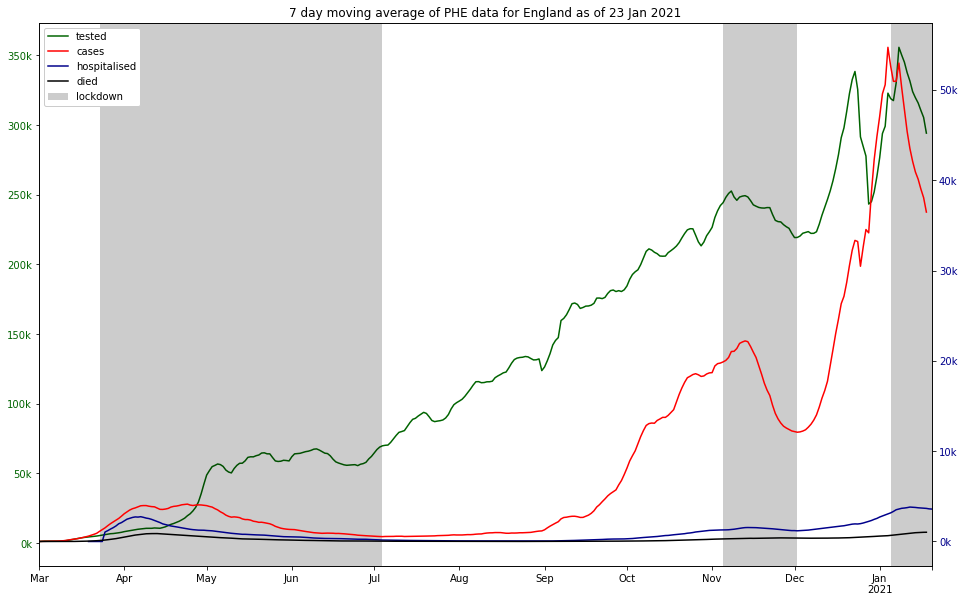

In [12]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [13]:
download('vaccination', 'nation', *vaccination_new_and_weekly, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_2021-01-23.csv')

In [14]:
download('vaccination_cum', 'nation', *vaccination_cumulative, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_cum_2021-01-23.csv')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,Northern Ireland,N92000002,23407.0,154366.0,130959.0,1893667,1.236067,6.915630,91.848303
1,Scotland,S92000003,5188.0,380667.0,375479.0,5463300,0.094961,6.872751,93.032288
2,Wales,W92000004,469.0,240547.0,240078.0,3152879,0.014875,7.614564,92.370560
3,England,E92000001,440300.0,5085771.0,4645471.0,56286961,0.782242,8.253192,90.964566


'5,861,351'

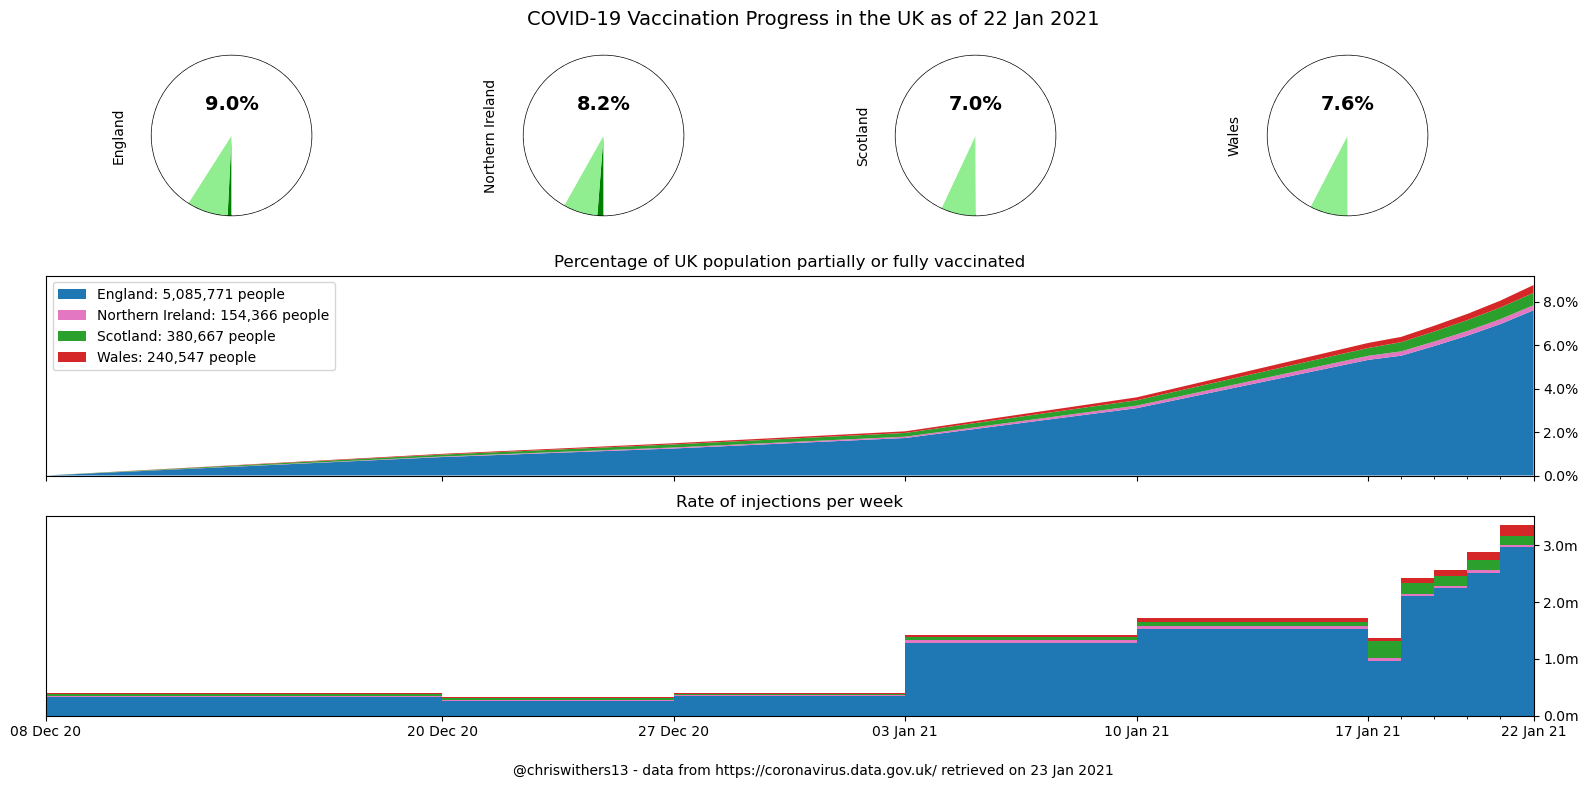

In [15]:
results = vaccination_dashboard()
display(results)
f"{results['any'].sum():,.0f}"

In [16]:
vaccination_corrections()

In [17]:
download(nation, nation, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2021-01-23.csv')

In [18]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2021-01-23.csv')

In [19]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2021-01-23.csv')

In [20]:
if is_msoa_data_ready():
    path = download(msoa, msoa, new_cases_sum, new_cases_rate, new_cases_change, 'release', release=release)
    display(path)
    check_path(path)

today: 2021-01-23, release: 2021-01-23 16:00:05.961881+00:00, msoa: 2021-01-23 16:20:20+00:00


PosixPath('/Users/chris/coronavirus/data/msoa_2021-01-23.csv')